In [7]:
import math
from matplotlib import scale
import pandas_datareader as pdr
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,Dropout, LSTM
import matplotlib.pyplot as plt

In [8]:
start = '2012-01-01'
end = '2021-12-31'
df = pdr.DataReader('TSLA', 'yahoo', start,end)
df.head

<bound method NDFrame.head of                    High          Low         Open        Close      Volume  \
Date                                                                         
2012-01-03     5.900000     5.530000     5.788000     5.616000   4640500.0   
2012-01-04     5.734000     5.500000     5.642000     5.542000   3150500.0   
2012-01-05     5.586000     5.370000     5.552000     5.424000   5027500.0   
2012-01-06     5.558000     5.282000     5.440000     5.382000   4931500.0   
2012-01-09     5.498000     5.224000     5.400000     5.450000   4485000.0   
...                 ...          ...          ...          ...         ...   
2021-12-27  1117.000000  1070.719971  1073.670044  1093.939941  23715300.0   
2021-12-28  1119.000000  1078.420044  1109.489990  1088.469971  20108000.0   
2021-12-29  1104.000000  1064.140015  1098.640015  1086.189941  18718000.0   
2021-12-30  1095.550049  1053.150024  1061.329956  1070.339966  15680300.0   
2021-12-31  1082.000000  1054.5899

In [10]:
df= df.reset_index() 
df.head

<bound method NDFrame.head of            Date         High          Low         Open        Close  \
0    2012-01-03     5.900000     5.530000     5.788000     5.616000   
1    2012-01-04     5.734000     5.500000     5.642000     5.542000   
2    2012-01-05     5.586000     5.370000     5.552000     5.424000   
3    2012-01-06     5.558000     5.282000     5.440000     5.382000   
4    2012-01-09     5.498000     5.224000     5.400000     5.450000   
...         ...          ...          ...          ...          ...   
2512 2021-12-27  1117.000000  1070.719971  1073.670044  1093.939941   
2513 2021-12-28  1119.000000  1078.420044  1109.489990  1088.469971   
2514 2021-12-29  1104.000000  1064.140015  1098.640015  1086.189941   
2515 2021-12-30  1095.550049  1053.150024  1061.329956  1070.339966   
2516 2021-12-31  1082.000000  1054.589966  1073.439941  1056.780029   

          Volume    Adj Close  
0      4640500.0     5.616000  
1      3150500.0     5.542000  
2      5027500.0     

In [40]:
df= df.drop(['Date','Adj Close'],axis=1)
df.head

<bound method NDFrame.head of              High          Low         Open        Close      Volume
0        5.900000     5.530000     5.788000     5.616000   4640500.0
1        5.734000     5.500000     5.642000     5.542000   3150500.0
2        5.586000     5.370000     5.552000     5.424000   5027500.0
3        5.558000     5.282000     5.440000     5.382000   4931500.0
4        5.498000     5.224000     5.400000     5.450000   4485000.0
...           ...          ...          ...          ...         ...
2512  1117.000000  1070.719971  1073.670044  1093.939941  23715300.0
2513  1119.000000  1078.420044  1109.489990  1088.469971  20108000.0
2514  1104.000000  1064.140015  1098.640015  1086.189941  18718000.0
2515  1095.550049  1053.150024  1061.329956  1070.339966  15680300.0
2516  1082.000000  1054.589966  1073.439941  1056.780029  13577900.0

[2517 rows x 5 columns]>

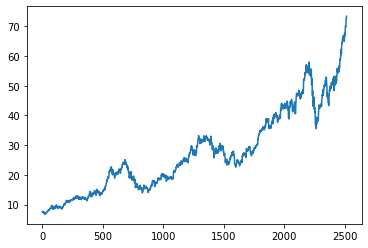

In [31]:
plt.plot(df.Close)

In [41]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2512    893.110598
2513    896.848997
2514    900.719897
2515    904.285696
2516    907.753597
Name: Close, Length: 2517, dtype: float64

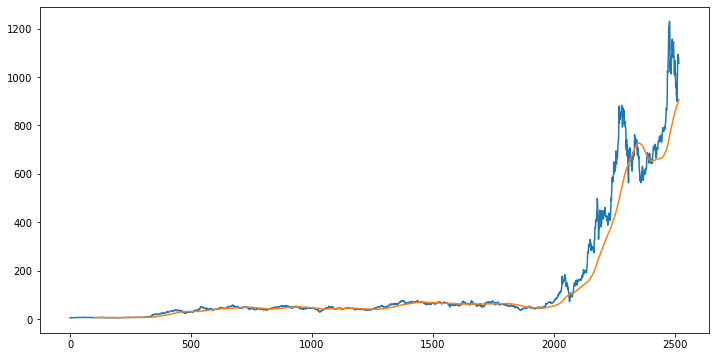

In [42]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100)

In [43]:
ma200 = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2512    774.217599
2513    776.120248
2514    778.166798
2515    780.009448
2516    782.027548
Name: Close, Length: 2517, dtype: float64

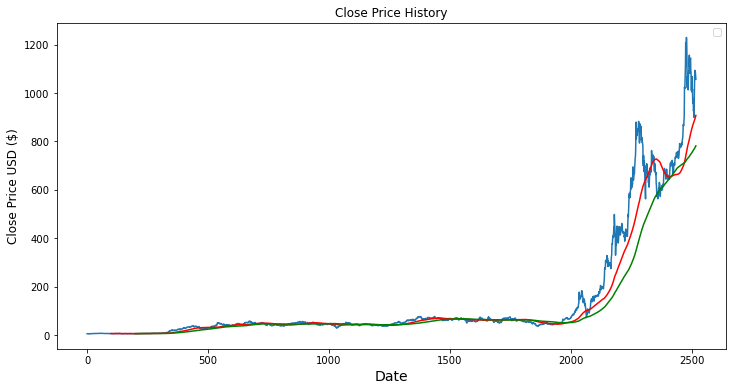

In [44]:
plt.figure(figsize=(12,6))
plt.title("Close Price History")
plt.legend(["Green shows close price of 200 days","red shows close price of 100 days"])
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')
plt.xlabel('Date',fontsize=14)
plt.ylabel('Close Price USD ($)', fontsize=12)
plt.show()

In [45]:
df.shape

(2517, 5)

In [46]:
#Splitting data into training set into testing set
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.80)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2013, 1)
(756, 1)


In [47]:
data_training.head

<bound method NDFrame.head of           Close
0      5.616000
1      5.542000
2      5.424000
3      5.382000
4      5.450000
...         ...
2008  86.188004
2009  86.075996
2010  82.940002
2011  83.666000
2012  86.052002

[2013 rows x 1 columns]>

In [48]:
data_testing.head

<bound method NDFrame.head of             Close
1761    60.071999
1762    63.537998
1763    66.991997
1764    67.070000
1765    67.706001
...           ...
2512  1093.939941
2513  1088.469971
2514  1086.189941
2515  1070.339966
2516  1056.780029

[756 rows x 1 columns]>

In [50]:
scaler =  MinMaxScaler(feature_range=(0, 1))

In [51]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01296092],
       [0.01205439],
       [0.01060884],
       ...,
       [0.9602107 ],
       [0.96910446],
       [0.99833393]])

In [53]:
x_train=[]
y_train=[]

#from sklearn.preprocessing import MinMaxScaler
for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
x_train, y_train=np.array(x_train), np.array(y_train)



In [54]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences= True , input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences= True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences= True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [55]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [56]:
model.compile(optimizer='adam', loss= 'mean_squared_error')
model.fit(x_train, y_train, epochs= 50)

Epoch 1/50
60/60 [==============================] - 16s 216ms/step - loss: 0.0495
Epoch 2/50
60/60 [==============================] - 13s 219ms/step - loss: 0.0113
Epoch 3/50
60/60 [==============================] - 13s 216ms/step - loss: 0.0105
Epoch 4/50
60/60 [==============================] - 13s 217ms/step - loss: 0.0092
Epoch 5/50
60/60 [==============================] - 13s 217ms/step - loss: 0.0085
Epoch 6/50
60/60 [==============================] - 13s 219ms/step - loss: 0.0080
Epoch 7/50
60/60 [==============================] - 13s 224ms/step - loss: 0.0082
Epoch 8/50
60/60 [==============================] - 13s 219ms/step - loss: 0.0078
Epoch 9/50
60/60 [==============================] - 13s 216ms/step - loss: 0.0076
Epoch 10/50
60/60 [==============================] - 13s 222ms/step - loss: 0.0069
Epoch 11/50
60/60 [==============================] - 13s 224ms/step - loss: 0.0062
Epoch 12/50
60/60 [==============================] - 13s 218ms/step - loss: 0.0060
Epoch 13/50
6

In [57]:
model.save('keras_model.h5')

In [58]:
data_testing.head

<bound method NDFrame.head of             Close
1761    60.071999
1762    63.537998
1763    66.991997
1764    67.070000
1765    67.706001
...           ...
2512  1093.939941
2513  1088.469971
2514  1086.189941
2515  1070.339966
2516  1056.780029

[756 rows x 1 columns]>

In [59]:
data_training.tail(100)

,Close
1913,45.801998
1914,47.000000
1915,43.924000
1916,43.127998
1917,43.987999
...,...
2008,86.188004
2009,86.075996
2010,82.940002
2011,83.666000


In [60]:
past_100_days = data_training.tail(100)

In [61]:
final_df = past_100_days.append(data_testing, ignore_index= True)

In [62]:
final_df.head

<bound method NDFrame.head of            Close
0      45.801998
1      47.000000
2      43.924000
3      43.127998
4      43.987999
..           ...
851  1093.939941
852  1088.469971
853  1086.189941
854  1070.339966
855  1056.780029

[856 rows x 1 columns]>

In [63]:
#applying scaling data
input_data = scaler.fit_transform(final_df)
input_data

array([[0.00838109],
       [0.00938435],
       [0.00680838],
       [0.00614178],
       [0.00686198],
       [0.00801597],
       [0.00785351],
       [0.00701105],
       [0.00723213],
       [0.00543163],
       [0.00603459],
       [0.0058805 ],
       [0.00613341],
       [0.00715843],
       [0.00781164],
       [0.00771114],
       [0.00698592],
       [0.00847656],
       [0.00811982],
       [0.00884671],
       [0.00947479],
       [0.01141095],
       [0.01120494],
       [0.01109273],
       [0.01069243],
       [0.01102406],
       [0.01080632],
       [0.01132721],
       [0.01032563],
       [0.0104278 ],
       [0.00740966],
       [0.00832918],
       [0.01065056],
       [0.01057854],
       [0.0103675 ],
       [0.01100731],
       [0.01074602],
       [0.0090544 ],
       [0.00878642],
       [0.00983991],
       [0.01023016],
       [0.01098051],
       [0.01101568],
       [0.01154327],
       [0.01306238],
       [0.01321815],
       [0.01352968],
       [0.013

In [64]:
input_data.shape

(856, 1)

In [65]:
#Define x_text and y_test
x_test=[]
y_test=[]
for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])


In [68]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(756, 100, 1)
(756,)


In [69]:
# Making Prediction
y_predicted = model.predict(x_test)

In [70]:
y_predicted.shape

(756, 1)

In [71]:
print(scaler.scale_)

[0.00083744]


In [72]:
scale_factor = 1/0.00083744
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

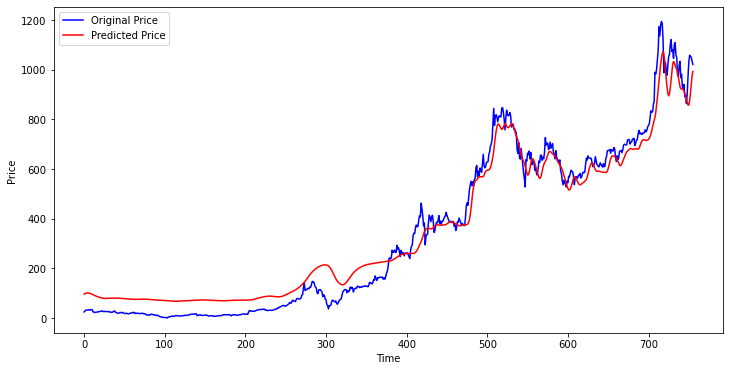

In [74]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()